In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D, MaxPooling2D,Input
from keras.datasets import fashion_mnist


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

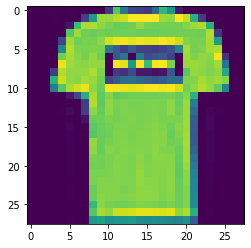

In [4]:
plt.imshow(x_train[1])

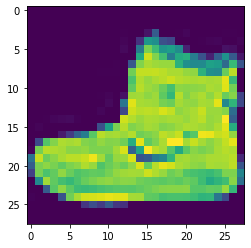

In [5]:
plt.imshow(x_train[0])

In [6]:
# Next, we will preprocess the data by scaling the pixel values to be between 0 and 1, and then reshaping
# the images to be 28x28 pixels.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# 28, 28 comes from width, height, 1 comes from the number of channels
# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an ndarray or Tensor when
# reshaped must remain the same.
# each image is a row vector (784 elements) and there are lots of such rows (let it be n, so there are 784n
# elements). So TensorFlow can infer that -1 is n.
# converting the training_images array to 4 dimensional array with sizes 60000, 28, 28, 1 for 0th to 3rd
# dimension

In [8]:

model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Input(shape=(28,28,1)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation="softmax"))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [9]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 54s 29ms/step - loss: 0.9309 - accuracy: 0.6188 - val_loss: 0.4117 - val_accuracy: 0.8590


In [10]:
# 1875 is a number of batches. By default batches contain 32 samles.60000 / 32 = 1875
# Finally, we will evaluate the performance of the model on the test data.
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4117 - accuracy: 0.8590


In [11]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


In [18]:
predictions = model.predict(x_test[:2])

In [21]:
l[]

9

In [20]:
l = np.argmax(predictions)
y_test[:2]

array([9, 2], dtype=uint8)

In [14]:
label = labels[np.argmax(predictions)]

In [15]:
label

'ankle_boots'

9


<function matplotlib.pyplot.show(close=None, block=None)>

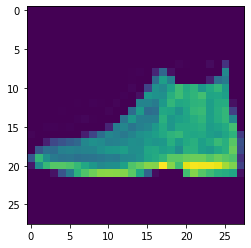

In [16]:
import matplotlib.pyplot as plt
print(l)
plt.imshow(x_test[:1][0])
plt.show